# Data Science NFL Suspension Project

Josh Luberisse

In [2]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from IPython.display import Image

import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight') # Using the FiveThirtyEight style
import statsmodels.api as sm
import matplotlib

from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Classifying NFL Player Violation Based on Length of Suspension

The NFL has been on the news a lot lately and for better or worse, the league has attracted the attention of many people who perhaps under normal circumstances would not care much for sports. 

#### About My Data

I am going to be using a dataset that was collected by Nate Silver of Fivethirtyeight fame where he collected every NFL suspension issued in the past 94-years in order to gain a better understanding of how the length of player suspension for violations such as domestic violence, steroid or substance abuse, were determined. If for instance domestic abuse warranted two games suspension, what kinds of conduct violations warranted five games? Eight games? An entire season? 

#### VARIABLE DESCRIPTIONS

* **name** –– first initial.last name
* **team** –– team at time of suspension
* **games** –– number of games suspended (one regular season = 16 games)
* **category** –– personal conduct, substance abuse, peformance enhancing drugs or in-game violence
* **desc.** –– description
* **year** –– year of suspension
* **source** –– news source


In [17]:
# Importing the dataset
#rf1dataset = pd.read_csv('nfl-suspensions-data.csv')
rf1dataset = pd.read_csv('nfl-suspensions-data.csv')                
rf1dataset.head()

,name,team,games,category,desc.,year,source
0,F. Davis,WAS,Indef.,"Substance abuse, repeated offense",Marijuana-related,2014,http://www.cbssports.com/nfl/eye-on-football/2...
1,J. Blackmon,JAX,Indef.,"Substance abuse, repeated offense",NaN,2014,http://espn.go.com/nfl/story/_/id/11257934/jus...
2,L. Brazill,IND,Indef.,"Substance abuse, repeated offense",NaN,2014,http://www.nfl.com/news/story/0ap2000000364622...
3,T. Jackson,WAS,Indef.,"Substance abuse, repeated offense",NaN,2014,http://www.nfl.com/news/story/0ap2000000364087...
4,M. Hapes,NYG,Indef.,Personal conduct,Gambling-related,1946,http://espn.go.com/blog/nflnation/tag/_/name/f...


In [18]:
rf1dataset.columns

Index(['name', 'team', 'games', 'category', 'desc.', 'year', 'source'], dtype='object')

In [19]:
rf1dataset.isnull().sum()

name          0
team          0
games         0
category      0
desc.       178
year          0
source        0
dtype: int64

In [20]:
rf1dataset = rf1dataset.drop(['name', 'team', 'desc.', 'year', 'source' ], 1)
rf1dataset.head()

,games,category
0,Indef.,"Substance abuse, repeated offense"
1,Indef.,"Substance abuse, repeated offense"
2,Indef.,"Substance abuse, repeated offense"
3,Indef.,"Substance abuse, repeated offense"
4,Indef.,Personal conduct


In [21]:
rf1dataset.drop(rf1dataset.index[0:6], inplace=True)

In [22]:
rf1dataset

,games,category
6,36,Personal conduct
7,32,"Substance abuse, repeated offense"
8,32,"Substance abuse, repeated offense"
9,20,Personal conduct
10,16,Personal conduct
11,16,Personal conduct
12,16,"Substance abuse, repeated offense"
13,16,"Substance abuse, repeated offense"
14,16,"Substance abuse, repeated offense"
15,16,"Substance abuse, repeated offense"


In [23]:
offense = pd.get_dummies(rf1dataset['category'],drop_first=True)
offense.head()

,PEDs,"PEDs, repeated offense",Personal conduct,Substance abuse,"Substance abuse, repeated offense"
6,0,0,1,0,0
7,0,0,0,0,1
8,0,0,0,0,1
9,0,0,1,0,0
10,0,0,1,0,0


In [10]:
rf1dataset.drop(['category'],axis=1,inplace=True)

In [11]:
rf1dataset = pd.concat([rf1dataset,offense],axis=1)
rf1dataset.head()

NameError: name 'offense' is not defined

### Create Training And Test Data

In [277]:
#X =  pd.factorize(rf1dataset[''])[0]
#X.reshape(-1, 1)
#y = rf1dataset ['games']
X = rf1dataset.iloc[:, [2, 3]].values
y = rf1dataset.iloc[:, 4].values
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [298]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
#rf1dataset['is_train'] = np.random.uniform(0, 1, len(rf1dataset)) <= .75
# Test set is 25% of our dataset, training set is 75%

# View the top 5 rows
rf1dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [212]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = rf1dataset[rf1dataset['is_train'] == True], rf1dataset[rf1dataset['is_train'] == False]

In [213]:
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 193
Number of observations in the test data: 70


In [214]:
train.head()

,games,category,is_train
6,36,Personal conduct,True
7,32,"Substance abuse, repeated offense",True
10,16,Personal conduct,True
11,16,Personal conduct,True
12,16,"Substance abuse, repeated offense",True


In [215]:
test.head()

,games,category,is_train
8,32,"Substance abuse, repeated offense",False
9,20,Personal conduct,False
15,16,"Substance abuse, repeated offense",False
19,16,"Substance abuse, repeated offense",False
20,16,"Substance abuse, repeated offense",False


### Preprocess Data

In [290]:
#x = pd.factorize(train['category'])[0]

# View target –– note that it is CATEGORICAL five possible classes)
#x

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 3, 3, 3,
       3, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 5, 5, 3, 3, 0, 0, 0, 0, 0, 5, 5, 4, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5])

In [299]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting Random Forest Classification to the Training set

In [294]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicting the Test set results

In [301]:
y_pred = classifier.predict(X_test)

In [281]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
#clf = RandomForestClassifier(n_jobs = 2, random_state = 0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
#clf.fit(train[features], y)

In [282]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
#clf = RandomForestClassifier(n_jobs = 2, random_state = 0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
#clf.fit(train[features], y)

# Making the Confusion Matrix

In [284]:
# Apply the Classifier we trained to the test data (which, remember, it has NEVER SEEN before)
#clf.predict(test[features]) # Here, we use the PREDICT METHOD

In [302]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [285]:
# View the predicted probabilities of the first 20 observations
#clf.predict_proba(test[features])[0:20]

### Evaluate Classifier

In [289]:
# Create actual english names for the plants for each predicted plant class

# Going from encoded variable back to actual name
#preds = rf1dataset.target_names[clf.predict(test[features])]

## Visualising the Training set results

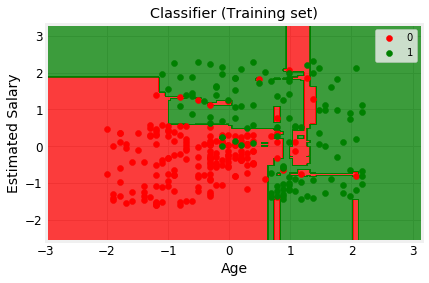

In [287]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

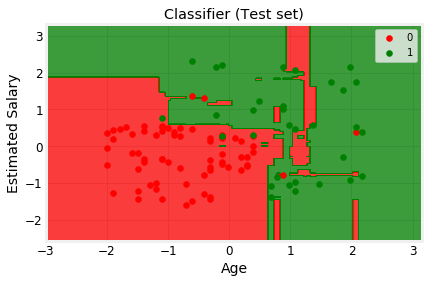

In [288]:

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## K-Means Clustering

In [248]:
kdataset = rf1dataset

In [249]:
X =  pd.factorize(kdataset['category'])[0]

In [252]:
kdataset['category']  = X

In [253]:
kdataset

,games,category,is_train
6,36,0,True
7,32,1,True
8,32,1,False
9,20,0,False
10,16,0,True
11,16,0,True
12,16,1,True
13,16,1,True
14,16,1,True
15,16,1,False


In [255]:
X = kdataset.iloc[:, 1].values # X is our array, or matrix, and columns 3 
# and 4 (in Python, indicies start @ 0) are Annual Incomes and Spending Scores

# This is when we start using K-Means specifical

In [268]:
X.reshape (1, -1)

array([[0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 1, 3, 3, 3, 3, 1, 4, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 4, 3, 3, 3,
        3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 4, 4, 3, 3, 3, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 0]])

In [262]:
## Using the Elbow Method to find the Optimal Number of Clusters ##

from sklearn.cluster import KMeans # Importing the KMeans class (or blueprint)
wcss = [] # We first calculate the WCSS for TEN DIFF. numbers of clusters, and   
          # so we are going to use a LOOP here (ten diff. ITERATIONS)
for i in range(1, 11): # Rem. that in Python 11 is excluded
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
    # kmeans is our OBJECT (our house)
    # init being set = to kmeans++ rather than random helps us avoid the RANDOM 
    # INITIALIZATION trap
    # max_iter is the maximum # of iterations that can be run to find the final
    # location of the cluster's centroids
    # n_init is the # of times the kmeans++ algorithm will be run with DIFF.
    # INITIAL CENTROIDS
    # By not adding the other arguments, our KMeans function automatically 
    # assumes their DEFAULT values
    kmeans.fit(X) # FIT is a METHOD (a tool) of the CLASS (blueprint) KMeans
    # that FITS the kmeans++ algorithm to your data
    wcss.append(kmeans.inertia_) # Used to calc. the WC Sum of Squares (WCSS)  
                                 # and append it to our list
    # This concludes our loop

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2. 2.
 2. 0. 0. 1. 3. 3. 3. 3. 1. 4. 3. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 1. 1. 4. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 4. 4.
 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 4. 4. 4. 4. 4. 4. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 5. 5. 5. 5. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

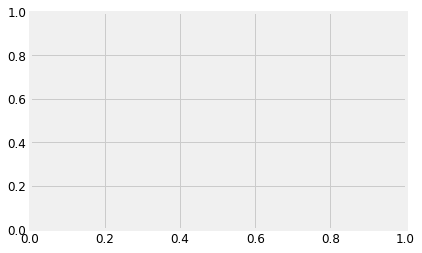

In [271]:
## Plotting the Elbow Method Graph ##

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show
# We see that the ELBOW is at n_clusters = 5

In [269]:
## Applying K-Means to the Mall Dataset ##

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X) #The fit_predict method tells to WHICH CLUSTER each OBS., or CLIENT, it BELONGS

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2. 2.
 2. 0. 0. 1. 3. 3. 3. 3. 1. 4. 3. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 1. 1. 4. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 4. 4.
 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 4. 4. 4. 4. 4. 4. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 5. 5. 5. 5. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [270]:



## Viscualizing the Clusters ##

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
# X[y_kmeans == 0, 0] specifies that we want the OBS.s belonging to CLUSTER 1
# and that we want the FIRST column of our data X (reason for our second 0). By
# doing this we make available all of the x-COORDINATES that BELONG to CLUSTER 1
# X[y_kmeans == 0, 1] specifies that we want the OBS.s belonging to CLUSTER 1
# and that we want the SECOND column of our data X (reason for our second 0). By
# doing THIS we make available all of the y-COORDINATES that BELONG to CLUSTER 1
# (I.e., the first column of X is our x-coordinate, the second column of X is 
#  our y-coordinate). 's' is the SIZE of our data points (?) and 'c' is the COLOR
# of our cluster
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3') 
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# We do this in turn for every cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# This last line (102) is us plotting the CENTROIDS. The cluster_centers attribute
# returns the COORDINATE of the CENTROIDS. To highlight them well, we choose
# s = 300 (making it larger) and star color YELLOW

plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() # Gives us a legend of the diff. LABELS
plt.show()


## Labeling the Clusters by Client's Perceived Types ##

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard') 
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target') 
# With both a HIGH level of income as well as a HIGH spending score, this is the
# particular demographic the MALL would like to target during a MARKETING CAMPAIGN
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless') 
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()




NameError: name 'y_kmeans' is not defined